In [1]:
from johnson import *

In [57]:
# corpus = Corpus('ecco_tcp')
# corpus2 = Corpus('tedjdh')
# meta = pd.concat([corpus2.meta, corpus.meta]).reset_index().drop_duplicates('id',keep='first').set_index('id')
corpus = Corpus('tedjdh')
meta=pd.read_pickle('data.metadata.pkl')
# meta = corpus.meta
# meta['num_words']=[len(' '.join(corpus.textd[idx].sents()[:1000]).split()) for idx in tqdm(meta.index)]

In [58]:
# meta.to_pickle('data.metadata.pkl')

In [60]:
# meta[['num_words2','num_words']]
goodmeta=meta.query('ocr_accuracy>=.9')[['author','medium','num_words','title','year','ocr_accuracy']]
goodmeta

,author,medium,num_words,title,year,ocr_accuracy
id,,,,,,
K000039.000,"Centlivre, Susanna, 1667?-1723",Drama,15229,THE BASSET-Table. A COMEDY. As it is Acted at the Theatre-Royal in Drury-Lane by Her Majesty's Servants.,1706,0.929691
K000122.000,"Jones, Henry, 1721-1770",Poetry,505,THE Bricklayer's POEM TO THE Countess of CHESTERFIELD On Her LADYSHIP'S saving the SOLDIERS from being shot.,1745,0.945525
K000152.000,"Congreve, William, 1670-1729",Poetry,306,PROLOGUE TO THE COURT; On the QUEEN's Birth-Day 1704.,1705,0.954693
K000180.000,"Cumberland, Richard, 1732-1811",Drama,17068,THE FASHIONABLE LOVER; A COMEDY: As it is acted at the THEATRE-ROYAL IN DRURY-LANE.,1772,0.949095
K000266.000,"Defoe, Daniel, 1661?-1731",Non-Fiction,21700,THE Dyet of POLAND A SATYR. CONSIDER'D Paragraph by Paragraph. To which is added A Key to the whole with the Names of the Author and the Nobility and Gentry that are Scandalously Pointed at in it.,1705,0.936901
...,...,...,...,...,...,...
WhitJMO,"Whittier, John Greenleaf",Poetry,9270,"Miriam, and other poems",1871,0.972335
WhitJPO,"Whittier, John Greenleaf",Poetry,17916,"The panorama, and other poems",1856,0.973399
WhitJPP,"Whittier, John Greenleaf",Poetry,13706,"The Pennsylvania pilgrim, and other poems",1871,0.971683


In [61]:
data = get_db_data(suffix='_tedjdh')
data

  0%|          | 0/3778 [00:00<?, ?it/s]

100%|██████████| 3778/3778 [00:10<00:00, 357.08it/s]


,sent_num,word_beg,word_mid,word_end,pos_beg,pos_mid,pos_end,plen,is_valid,sent
id,,,,,,,,,,
ChilLLF,3,sweet,and,potent,ADJ,CCONJ,ADJ,1,True,"And would we aught behold of higher worth Than that inanimate cold world, allowed To the poor loveless ever-anxious crowd, Ah, from the soul itself must issue forth A light, a glory, a fair luminous cloud, Enveloping the Earth : And from the soul itself must there be sent A sweet and potent voice of its own birth, Of all sweet sounds the life and element !"
ChilLLF,3,the life,and,element,DET NOUN,CCONJ,NOUN,1,True,"And would we aught behold of higher worth Than that inanimate cold world, allowed To the poor loveless ever-anxious crowd, Ah, from the soul itself must issue forth A light, a glory, a fair luminous cloud, Enveloping the Earth : And from the soul itself must there be sent A sweet and potent voice of its own birth, Of all sweet sounds the life and element !"
ChilLLF,8,act,of,Congress,NOUN,ADP,PROPN,1,True,"Entered according to act of Congress, in the year 1843, By Convers Francis, In the Clerk's Office of the District Court for the Southern District of New-Yor] THE NE W YORK PUBLIC UBRARV | fctor.UnoxandTMen, Foundations."
ChilLLF,8,the Southern District,of,New Yor,DET PROPN PROPN,ADP,PROPN PROPN,2,True,"Entered according to act of Congress, in the year 1843, By Convers Francis, In the Clerk's Office of the District Court for the Southern District of New-Yor] THE NE W YORK PUBLIC UBRARV | fctor.UnoxandTMen, Foundations."
ChilLLF,13,romance,and,mysticism,NOUN,CCONJ,NOUN,1,True,"i These pages are so deeply tinged with romance and mysticism, that they might seem an unfit offering to one who has the crowning merit of the 19th century -- that of being a cautious and energetic "" business man."""
...,...,...,...,...,...,...,...,...,...,...
BainAJS,996,Readings,at,Grote,NOUN,ADP,PROPN,1,True,Readings at Grote s (turned This was the year of his entering the India House.
BainAJS,998,The clerks,in,those days,DET NOUN,ADP,DET NOUN,1,True,"The clerks in those days had no salary, only a gratuity."
BainAJS,999,the end,of,that time,DET NOUN,ADP,DET NOUN,1,True,"For three years, Mill had ^30 a-year; at the end of that time, he received a salary of ^100, with an annual rise of pio."


In [62]:
datameta=data.join(goodmeta,how='inner')
datameta

,sent_num,word_beg,word_mid,word_end,pos_beg,pos_mid,pos_end,plen,is_valid,sent,author,medium,num_words,title,year,ocr_accuracy
id,,,,,,,,,,,,,,,,
AbraIJL,1,University,of,Toronto,PROPN,ADP,PROPN,1,True,"iLontiott MACMILLAN AND CO., Ltd. NEW YORK: THE MACMILLAN CO. [/1/i rights reserved ^l-^G OXFORD HORACE HART, PRINTER TO THE UNIVERSITY TO MY WIFE Digitized by the Internet Archive in 2011 with funding from University of Toronto http://www.archive.org/details/jewishlifeinmidOOabra PREFACE Though I have everywhere referred to the works from which I have derived incidental facts, or from which I have borrowed quotations, there are three writers to whom I should like to express my more general indebtedness.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,6,citations,from,Response,NOUN,ADP,PROPN,1,True,"Moreover, a large proportion of my quotations, and almost all my citations from Response, have been made at first hand.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,11,My indebtedness,to,another friend,PRON NOUN,ADP,DET NOUN,1,True,"My indebtedness to another friend has been of a different character, for it is to him that I owe the very possibility of writing this book.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,12,lessons,in,research,NOUN,ADP,NOUN,1,True,"From Mr. S. Shelter, Reader in Rabbinic in the Cambridge University, I learned in years gone by my first real lessons in research ; he introduced me to authorities, he gave me facts from the store-house of his memory, and theories from the spring of his original thought.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,13,word,of,thanks,NOUN,ADP,NOUN,1,True,To him my final word of thanks is affectionately written.,"Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZangIDG,967,The captain,of,the soldiers,DET NOUN,ADP,DET NOUN,1,True,"""The captain of the soldiers tells me they did not start fair at the Arch.","Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690
ZangIDG,989,a voice,of,thunder,DET NOUN,ADP,NOUN,1,True,he cried in a voice of thunder.,"Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690
ZangIDG,992,a space,of,awe,DET NOUN,ADP,NOUN,1,True,"And the crucifix whirled round, clearing a space of awe about him.","Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690


In [63]:
cols=['author','medium','plen','word_beg','word_mid','word_end','pos_beg','title']
datameta.query('plen>2')[cols].sample(10)

,author,medium,plen,word_beg,word_mid,word_end,pos_beg,title
id,,,,,,,,
K043640.000,"Berkeley, George, 1685-1753",Non-Fiction,4,the keeping of the Cash,and,the direction of the Bank,DET NOUN ADP DET NOUN,THE QUERIST CONTAINING Several QUERIES Proposed to the CONSIDERATION OF THE PUBLIC.
BowdJHS5,"Bowden, James",Non-Fiction,3,abridge their confidence,or,cloud their enjoyments,VERB PRON NOUN,The history of the Society of Friends in America (Vol. 2/2)
K094902.002,"Boreman, Thomas, fl. 1730-1743",Non-Fiction,3,Masters and Misses,in,town and country,PROPN CCONJ PROPN,CURIOSITIES In the Tower of London.
K094528.000,"Hutchinson, William, 1732-1814",Fiction,3,bent your way,and,taken your abode,VERB PRON NOUN,THE HERMITAGE; A BRITISH STORY.
MillJSS2,"Miller, Joaquin",Poetry,4,Made brown with grain,and,made green with bay,VERB ADJ ADP NOUN,Songs of the sun-lands
BellWNT,"Bell, William Abraham",Non-Fiction,3,"Mojave Sink 1,000",and,Perry Basin 530,PROPN PROPN NUM,New tracks in North America a journal of travel and adventure whilst engaged in the survey for a southern railroad to the Pacific ocean during 1867/8 (Vol. 1/2)
K082269.004,"Burney, Fanny, 1752-1840",Fiction,4,the sources of my doubts,and,the motives of my decision,DET NOUN ADP PRON NOUN,CECILIA OR MEMOIRS OF AN HEIRESS.
K046227.000,"Cugoano, Ottobah",Non-Fiction,3,to the rivers,and,to the ships,ADP DET NOUN,THOUGHTS AND SENTIMENTS ON THE EVIL AND WICKED TRAFFIC OF THE SLAVERY AND COMMERCE OF THE HUMAN SPECIES HUMBLY SUBMITTED TO The INHABITANTS of GREAT-BRITAIN BY OTTOBAH CUGOANO A NATIVE of AFRICA.
RomaAMO2,"Roman, Alfred",Non-Fiction,3,Calling Bushrod Johnson,from,the Bermuda Hundred Lines,PROPN PROPN PROPN,"The military operations of General Beauregard in the war between the states, 1861 to 1865; including a brief personal sketch and a narrative of his services in the war with Mexico, 1846-8 (Vol. 2/2)"


In [64]:
datameta.plen.value_counts()

1     1445766
2       86919
3       14704
0       14296
4        4158
5         836
6         306
7         111
8          52
9          23
10          9
11          8
12          6
13          2
14          1
Name: plen, dtype: int64

In [65]:
pd.set_option('display.max_colwidth', None)
datameta.query('10<=plen<14')[cols].sample(10)

,author,medium,plen,word_beg,word_mid,word_end,pos_beg,title
id,,,,,,,,
K123147.000,"Hume, David, 1711-1776",Non-Fiction,12,NO man will accept of low profits where he can have high interest,and,no man will accept of low interest where he can have high profits,DET NOUN AUX VERB ADP ADJ NOUN SCONJ PRON AUX VERB ADJ NOUN,The BEAUTIES OF Hume AND BOLINGBROKE.
K043848.000,"Dennis, John, 1657-1734",Non-Fiction,10,Instead of Majesty we have something that is very mean,and,instead of Gravity we have something that is very boyish,ADV ADP PROPN PRON VERB PRON PRON AUX ADV ADJ,REFLECTIONS Critical and Satyrical UPON A LATE RHAPSODY Call'd An ESSAY UPON CRITICISM.
K059867.001,"Kames, Henry Home, Lord, 1696-1782",Non-Fiction,10,Kindness to strangers is the national character of the former,and,hatred to strangers is the national character of the latter,NOUN ADP NOUN AUX DET ADJ NOUN ADP DET ADJ,SKETCHES OF THE HISTORY OF MAN.
FlemJPZ2,"Fleming, John",Non-Fiction,11,that the summer visitants arrive in spring and depart in autumn,and,that the winter visitants arrive in autumn and depart in spring,SCONJ DET NOUN NOUN VERB ADP NOUN CCONJ NOUN ADP NOUN,"The philosophy of zoology; or, A general view of the structure, functions, and classification of animals (Vol. 2/2)"
K097310.008,"Buffon, Georges Louis Leclerc, comte de, 1707-1788",Non-Fiction,11,The ears of the mule are longer than those of the horse,and,the ears of the bardeau are shorter than those of the ass,DET NOUN ADP DET NOUN AUX ADJ ADP PRON ADP DET NOUN,NATURAL HISTORY GENERAL AND PARTICULAR BY THE COUNT DE BUFFON TRANSLATED INTO ENGLISH.
K102448.001,"Kelly, Hugh, 1739-1777",Fiction,12,To be sure Mr. Garrick is the greatest actor in the world,or,To be sure Miss Brent is the finest singer in the universe,PART AUX ADJ PROPN PROPN AUX DET ADJ NOUN ADP DET NOUN,THE BABLER. CONTAINING A CAREFUL SELECTION FROM THOSE ENTERTAINING and INTERESTING ESSAYS. WHICH HAVE GIVEN the PUBLIC so much SATISFACTION under that TITLE DURING A COURSE of FOUR YEARS IN OWEN's WEEKLY CHRONICLE.
K097994.000,"Robins, Benjamin, 1707-1751",Non-Fiction,10,the velocity which the point moving on AB has at G,to,the velocity which the point moving on CD has at H,DET NOUN PRON DET NOUN VERB ADP PROPN VERB ADP PROPN,A DISCOURSE Concerning the NATURE and CERTAINTY OF Sir ISAAC NEWTON'S METHODS OF FLUXIONS AND OF PRIME and ULTIMATE RATIOS.
K064770.000,"Berkeley, George, 1685-1753",Non-Fiction,12,The Head which is seen seems farthest from the Earth which is seen,and,the Feet which are seen seem nearest to the Earth which is seen,DET PROPN PRON AUX VERB VERB ADJ ADP DET PROPN PRON AUX VERB,AN ESSAY Towards a New Theory OF VISION.
K113606.002,"Goldsmith, Oliver, 1728-1774",Non-Fiction,10,supplied with that nourishment which is fitted to its necessities,and,furnished with those organs that are adapted to its situation,VERB ADP DET NOUN PRON AUX VERB ADP PRON NOUN,AN HISTORY OF THE EARTH AND ANIMATED NATURE:


In [66]:
datameta[datameta.author.str.contains('Johnson, Samuel')].query('plen>2')[cols].sample(10)

,author,medium,plen,word_beg,word_mid,word_end,pos_beg,title
id,,,,,,,,
K008295.004,"Johnson, Samuel, 1709-1784",Non-Fiction,3,the whistle of winds,and,the dash of waters,DET NOUN ADP NOUN,THE RAMBLER.
K008295.003,"Johnson, Samuel, 1709-1784",Non-Fiction,3,the fumes of passion,or,the damps of cowardice,DET NOUN ADP NOUN,THE RAMBLER.
K008295.004,"Johnson, Samuel, 1709-1784",Non-Fiction,3,the shock of abruptness,or,the ignominy of contempt,DET NOUN ADP NOUN,THE RAMBLER.
K008295.004,"Johnson, Samuel, 1709-1784",Non-Fiction,3,all the rage of hatred,and,all the persecutions of calumny,DET DET NOUN ADP NOUN,THE RAMBLER.
K008295.001,"Johnson, Samuel, 1709-1784",Non-Fiction,3,the anxieties of ambition,and,the miseries of riches,DET NOUN ADP NOUN,THE RAMBLER.
K008295.006,"Johnson, Samuel, 1709-1784",Non-Fiction,3,this copiousness of ideas,and,felicity of language,DET NOUN ADP NOUN,THE RAMBLER.
K008295.002,"Johnson, Samuel, 1709-1784",Non-Fiction,3,enlarge the capacity,or,elevate the imagination,VERB DET NOUN,THE RAMBLER.
K008295.002,"Johnson, Samuel, 1709-1784",Non-Fiction,3,quickening the succession,and,enlarging the variety,VERB DET NOUN,THE RAMBLER.
K008295.004,"Johnson, Samuel, 1709-1784",Non-Fiction,3,bright with sunshine,and,fragrant with perfumes,ADJ ADP NOUN,THE RAMBLER.


In [67]:
# datameta=data.set_index('id').join(meta, lsuffix='_data', rsuffix='_meta')
# datameta

In [81]:
# odf = pd.concat([gdf.assign(num_parallels=len(gdf), num_words=gdf.reset_index().drop_duplicates('id').num_words.sum()) 
#                  for g, gdf in tqdm(datameta[cols + ['num_words']].groupby(['medium','author','plen']))])


In [83]:
datameta

,sent_num,word_beg,word_mid,word_end,pos_beg,pos_mid,pos_end,plen,is_valid,sent,author,medium,num_words,title,year,ocr_accuracy
id,,,,,,,,,,,,,,,,
AbraIJL,1,University,of,Toronto,PROPN,ADP,PROPN,1,True,"iLontiott MACMILLAN AND CO., Ltd. NEW YORK: THE MACMILLAN CO. [/1/i rights reserved ^l-^G OXFORD HORACE HART, PRINTER TO THE UNIVERSITY TO MY WIFE Digitized by the Internet Archive in 2011 with funding from University of Toronto http://www.archive.org/details/jewishlifeinmidOOabra PREFACE Though I have everywhere referred to the works from which I have derived incidental facts, or from which I have borrowed quotations, there are three writers to whom I should like to express my more general indebtedness.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,6,citations,from,Response,NOUN,ADP,PROPN,1,True,"Moreover, a large proportion of my quotations, and almost all my citations from Response, have been made at first hand.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,11,My indebtedness,to,another friend,PRON NOUN,ADP,DET NOUN,1,True,"My indebtedness to another friend has been of a different character, for it is to him that I owe the very possibility of writing this book.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,12,lessons,in,research,NOUN,ADP,NOUN,1,True,"From Mr. S. Shelter, Reader in Rabbinic in the Cambridge University, I learned in years gone by my first real lessons in research ; he introduced me to authorities, he gave me facts from the store-house of his memory, and theories from the spring of his original thought.","Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
AbraIJL,13,word,of,thanks,NOUN,ADP,NOUN,1,True,To him my final word of thanks is affectionately written.,"Abrahams, Israel",Non-Fiction,14667,Jewish life in the middle ages,1896,0.912924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZangIDG,967,The captain,of,the soldiers,DET NOUN,ADP,DET NOUN,1,True,"""The captain of the soldiers tells me they did not start fair at the Arch.","Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690
ZangIDG,989,a voice,of,thunder,DET NOUN,ADP,NOUN,1,True,he cried in a voice of thunder.,"Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690
ZangIDG,992,a space,of,awe,DET NOUN,ADP,NOUN,1,True,"And the crucifix whirled round, clearing a space of awe about him.","Zangwill, Israel",Fiction,18095,Dreamers of the Ghetto,1898,0.980690


In [155]:
datameta['author']=datameta.author.apply(lambda x: ', '.join(x.split(', ')[:2]))
gby=['author','plen']
odf = pd.DataFrame([
    {**dict(zip(gby,g)), 'num_parallels':len(gdf), 'num_words':gdf.reset_index().drop_duplicates('id').num_words.sum(), 'year':gdf.year.median()}
    for g, gdf in tqdm(datameta[datameta.medium.isin({'Oratory','Biography','Non-Fiction'})].query('1<=plen<=10').groupby(gby))
    if g[0] and g[1]
])
odf['num_parallels_per10000word'] = odf['num_parallels'] / odf['num_words'] * 10000
odf['year']=pd.to_numeric(odf['year'],errors='coerce')
def authortype(au):
    if 'Hazlitt, W' in au: return 'Hazlitt'
    if 'Addison, J' in au: return 'Addison'
    if 'Johnson, Samuel' in au: return 'Johnson'
    return ''
odf['author_cat']=odf.author.apply(authortype)
odf['author_size'] = odf.author_cat.apply(lambda x: x!='')
odf

100%|██████████| 3427/3427 [00:02<00:00, 1517.89it/s]


,author,plen,num_parallels,num_words,year,num_parallels_per10000word,author_cat,author_size
0,"Abbot, George",1,666,33182,1715.0,200.711229,,False
1,"Abbot, George",2,17,33182,1715.0,5.123260,,False
2,"Abbot, George",3,6,33182,1715.0,1.808209,,False
3,"Abrahams, Israel",1,373,14667,1896.0,254.312402,,False
4,"Abrahams, Israel",2,45,14667,1896.0,30.681121,,False
...,...,...,...,...,...,...,...,...
3414,"Young, Sir William",7,1,35045,1807.0,0.285347,,False
3415,"Young, Thomas",1,287,10638,1807.0,269.787554,,False
3416,"Young, Thomas",2,12,10638,1807.0,11.280316,,False
3417,"Young, Thomas",3,3,10638,1807.0,2.820079,,False


In [177]:
k='num_parallels_per10000word'
odf.sort_values(k,ascending=False).query('plen==3 & num_words>=10000').head(10)

,author,plen,num_parallels,num_words,year,num_parallels_per10000word,author_cat,author_size
17,"Adams, John Quincy",3,8,10068,1831.0,7.945967,,False
1729,"Johnson, Samuel",3,189,246249,1752.0,7.675158,Johnson,True
673,"Coldwell, Stephen",3,9,12807,1856.0,7.027407,,False
1842,"Knapp, Samuel Lorenzo",3,17,24261,1829.0,7.007131,,False
2425,"Philadelphus, Theophilus",3,17,24470,1777.0,6.947282,,False
1906,"Leslie, Thomas Edward Cliffe",3,18,26106,1879.0,6.894967,,False
1257,"Gammell, William",3,13,19252,1849.0,6.752545,,False
1725,"Johnson, Richard W",3,16,24726,1881.0,6.470921,,False
1828,"Kingsley, Charles",3,8,12852,1860.0,6.224712,,False
2787,"Shaw, George Bernard",3,13,21343,1889.0,6.090990,,False


In [157]:
# top=datameta.query('num_words_data>=5000').groupby('author').mean(numeric_only=True).sort_values(k,ascending=False)
# top.head(20)

In [191]:
datameta[datameta.author.str.contains('Addison, Joseph')][cols].query('plen>0').groupby('plen').sample(1)

,author,medium,plen,word_beg,word_mid,word_end,pos_beg,title
id,,,,,,,,
K015532.000,"Addison, Joseph",Drama,1,such a piece,of,Mummery,DET DET NOUN,THE DRUMMER; OR THE HAUNTED HOUSE. A COMEDY. As it is Acted at the Theatre-Royal in Drury-Lane BY His MAJESTY's Servants.
K019244.000,"Addison, Joseph",Non-Fiction,2,the immediate descendant,of,a fine gentleman,DET ADJ NOUN,THE TATLER.
K019244.000,"Addison, Joseph",Non-Fiction,3,embroidery of flowers,and,melody of birds,NOUN ADP NOUN,THE TATLER.
K019244.000,"Addison, Joseph",Non-Fiction,4,altogether to be contemned,or,rather to be desired,ADV PART AUX VERB,THE TATLER.
K072424.000,"Addison, Joseph",Non-Fiction,6,the extending or contracting of particular Words,by,the Insertion or Omission of certain Syllables,DET NOUN CCONJ NOUN ADP ADJ NOUN,NOTES UPON THE TWELVE BOOKS OF PARADISE LOST.
K072424.000,"Addison, Joseph",Non-Fiction,7,Secondly It should be an Entire Action,and,Thirdly It should be a Great Action,ADV PRON AUX AUX DET PROPN PROPN,NOTES UPON THE TWELVE BOOKS OF PARADISE LOST.
K120000.000,"Addison, Joseph",Non-Fiction,8,that it will be detrimental to the Peers,but,that it will be detrimental to the Commons,SCONJ PRON AUX AUX ADJ ADP DET PROPN,THE OLD WHIG. NUMB. II. WITH REMARKS UPON THE PLEBEIAN No II.


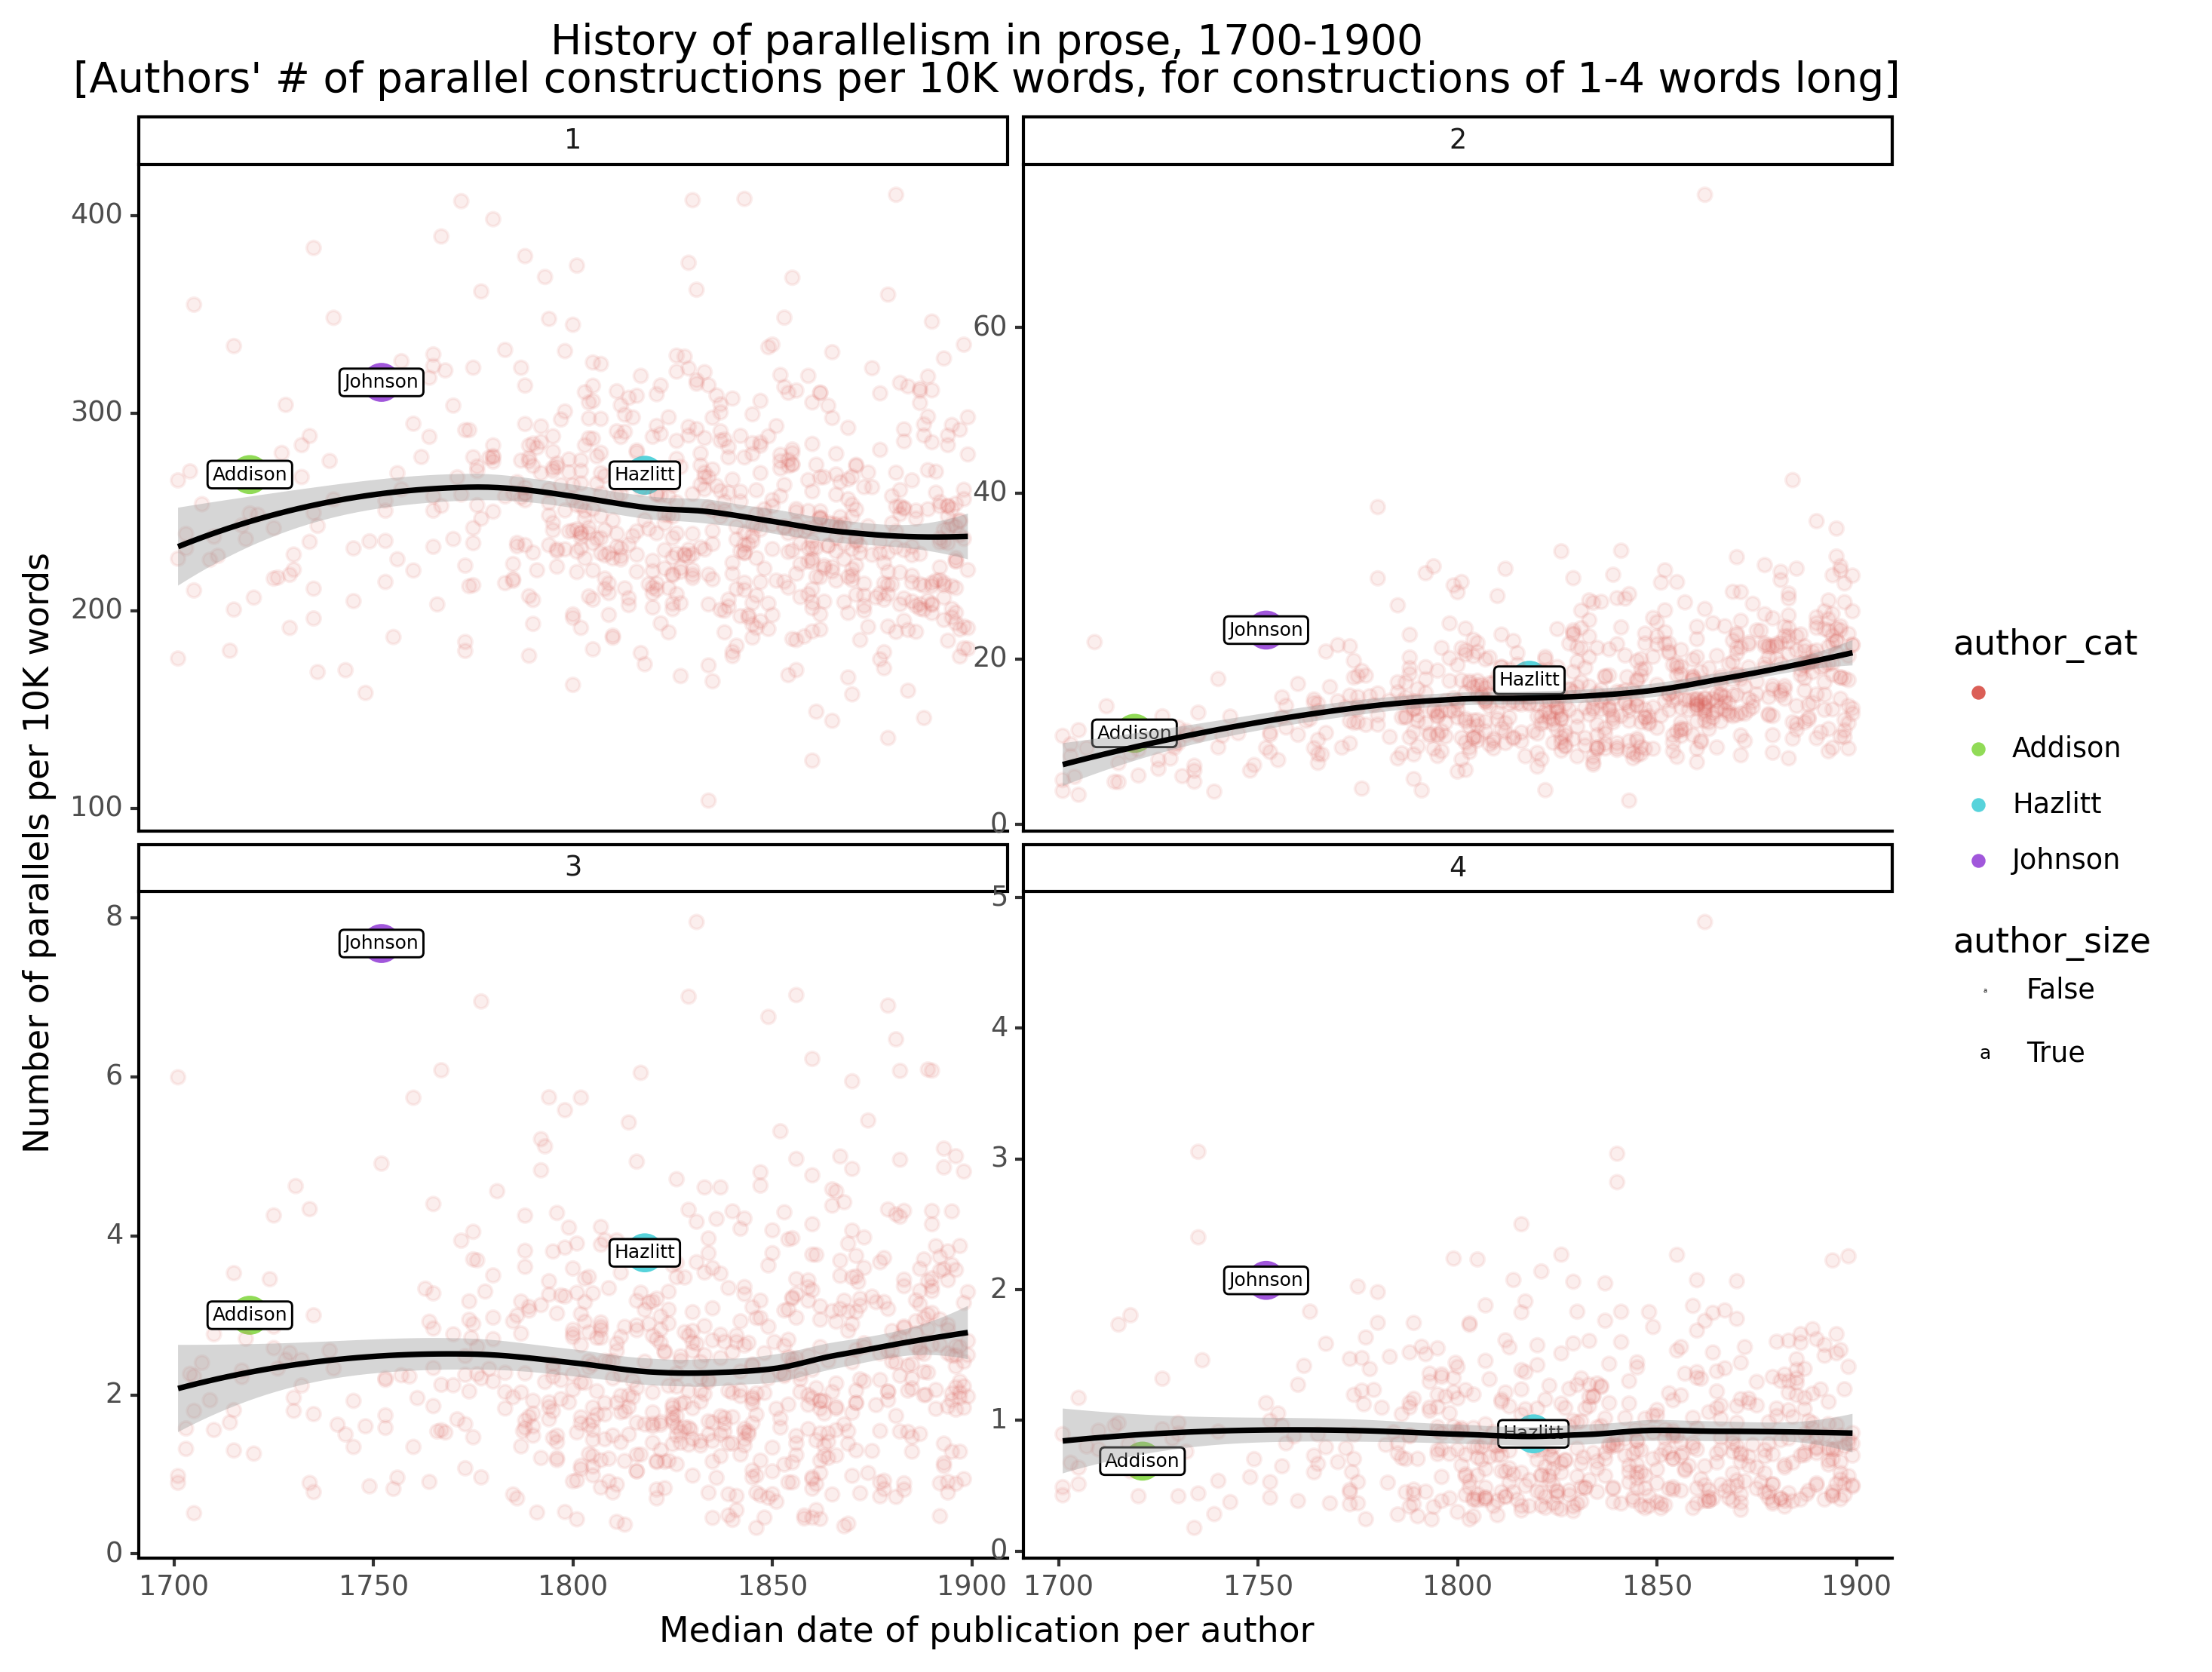

<ggplot: (1057404669)>

In [173]:
import plotnine as p9
p9.options.figure_size=10,8
k='num_parallels_per10000word'
figdf=odf.query('1700<=year<1900 & num_words>=10000 & 1<=plen<=4')
# figdf=figdf[figdf.medium.isin({'Oratory','Biography','Non-Fiction'})]
fig=p9.ggplot(figdf,p9.aes(x='year', y=k))
fig+=p9.geom_point(p9.aes(color='author_cat', size='author_size', alpha='author_size'))
fig+=p9.geom_label(p9.aes(label='author_cat', size='author_size'))
fig+=p9.geom_smooth(se=True,method='loess')
fig+=p9.facet_wrap('plen', scales='free_y')
fig+=p9.theme_classic()
fig+=p9.labs(
    title='History of parallelism in prose, 1700-1900\n[Authors\' # of parallel constructions per 10K words, for constructions of 1-4 words long]',
    y='Number of parallels per 10K words',
    x='Median date of publication per author'
)
fig.save('fig.author_parallel_history.png')
fig

In [166]:
datameta[datameta.author.str.contains('Johnson, Samuel')][['medium','title']]

,medium,title
id,,
K008295.001,Non-Fiction,THE RAMBLER.
K008295.001,Non-Fiction,THE RAMBLER.
K008295.001,Non-Fiction,THE RAMBLER.
K008295.001,Non-Fiction,THE RAMBLER.
K008295.001,Non-Fiction,THE RAMBLER.
...,...,...
K008295.006,Non-Fiction,THE RAMBLER.
K008295.006,Non-Fiction,THE RAMBLER.
K008295.006,Non-Fiction,THE RAMBLER.
